<a href="https://www.kaggle.com/code/alirizaercan/obesity-risk-data-science-with-details?scriptVersionId=174440472" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction
***In this notebook we will focus Multi-Class Prediction of Obesity Risk dataset in this code. It is playgorund series. We can say it is like real life problems. I will try to review this code from a beginner view. If you are ready, let's go!***


**We will have some parts in this code. These parts include every part of data science life cycle. If you want to be a succesfull data scientist/analyst/engineer, you shouldn't pass these life cycle steps!**

<font color='darkgreen'>
Content:

1. [Problem Definition and Project Planning](#1)
2. [Import Libraries](#2)   
3. [Load and Check Data](#3)
4. [Understand Dataset](#4)
5. [Column Description](#5)
6. [Exploratory Data Analysis](#6)   
    * [Univariate Variable Analysis(EDA)](#7)
7. [Basic Data Analysis](#8)
8. [Data Cleaning](#9)
    * [Outlier Detection](#10)
    * [Missing Values](#11)
9. [Feature Engineering](#12)
10. [Modeling](#13)
11. [Prediction and Submission](#14)

<a id = "1"></a><br>
# Problem Definition and Project Planning

## Problem Definition

This project aims to develop a predictive model that identifies individuals with a higher risk of obesity. Obesity is a significant health concern linked to cardiovascular disease.

### Project Planning

#### Understanding the Objective

Our main goal is to find the most optimal **submission.csv** file. The goal of this competition is to use various factors to predict obesity risk in individuals, which is related to cardiovascular disease.

#### Data Explanation

**Data Split:**

The dataset is divided into two groups:

- **Training set (train.csv):** the training dataset; NObeyesdad is the categorical target
- **Test set (test.csv):**  the test dataset; your objective is to predict the class of NObeyesdad for each row

**Import Libraries**

We will import the necessary libraries to perform data analysis and build machine learning models.

**Load and Check Data**

We will read and check the Multi-Class Prediction of Obesity Risk dataset in CSV format.
**Understand Dataset**

We will explore the dataset to gain a comprehensive understanding of its structure and contents.

**Column Description**

We will review columns.

**Exploratory Data Analysis (EDA)**

We will conduct Exploratory Data Analysis to deepen our understanding of the dataset. This includes visualizing data to uncover patterns and relationships.

**Basic Data Analysis**

We will perform basic data analysis to gain insights into the dataset.

**Data Cleaning**

We will clean the data by addressing issues such as duplicates, missing values, reformatting data types, checking and handling outliers, and validating.

**Feature Engineering**

We will focus on feature engineering to enhance the dataset for better model performance.

**Modelling**

We will choose the best machine learning model for predicting customer transactions based on the dataset.

**Submission File**

We will create the submission file, adhering to the required format.

Now, let's proceed with the code implementation according to these planned steps. Understanding each step is crucial for a comprehensive data science approach. Happy coding!

<a id = "2"></a><br>
# Import Libraries
We will need some libraries in this project, we need to import necessary libraries. We didn't choose our model so we will talk about model later. We can add our machine learning model libraries later. We can add 'matplotlib', 'seaborn', 'matplotlib.pyplot', 'warning' libraries right now. I can explain their roles in data science like that: 

**NumPy:**
Provides efficient numerical computation capabilities for arrays and matrices.

**Pandas:**
Offers high-performance, easy-to-use data structures and data analysis tools for labeled data.

**Matplotlib:**
Creates various static, animated, and interactive visualizations for data exploration and communication.

**Seaborn:**
Builds upon Matplotlib to create high-level statistical graphics with a focus on aesthetics and ease of use.

**warnings:**
Controls how Python handles warning messages.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

import seaborn as sns

from collections import Counter

import warnings
warnings.filterwarnings("ignore")



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/tmp/ipykernel_18/3803698544.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


/kaggle/input/playground-series-s4e2/sample_submission.csv
/kaggle/input/playground-series-s4e2/train.csv
/kaggle/input/playground-series-s4e2/test.csv


<a id = "3"></a><br>
# Load and Check Data
We will load and check data in this step.

We need to assign train_df and test_df in here. 

In [2]:
train_df = pd.read_csv('/kaggle/input/playground-series-s4e2/train.csv')
test_df = pd.read_csv('/kaggle/input/playground-series-s4e2/test.csv')
test_id = test_df["id"]

We will see our train dataframe in the below!

In [3]:
train_df

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


<a id = "4"></a><br>
# Understand Dataset
We can understand dataset with some codes and we can check the dataset.

We can see the columns of train dataset:

In [4]:
train_df.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

We will see the first 10 index and last 10 index in the below codes :

In [5]:
train_df.head(10)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
5,5,Male,18.128249,1.748524,51.552595,yes,yes,2.919751,3.000000,Sometimes,no,2.137550,no,1.930033,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
6,6,Male,29.883021,1.754711,112.725005,yes,yes,1.991240,3.000000,Sometimes,no,2.000000,no,0.000000,0.696948,Sometimes,Automobile,Obesity_Type_II
7,7,Male,29.891473,1.750150,118.206565,yes,yes,1.397468,3.000000,Sometimes,no,2.000000,no,0.598655,0.000000,Sometimes,Automobile,Obesity_Type_II
8,8,Male,17.000000,1.700000,70.000000,no,yes,2.000000,3.000000,Sometimes,no,3.000000,yes,1.000000,1.000000,no,Public_Transportation,Overweight_Level_I
9,9,Female,26.000000,1.638836,111.275646,yes,yes,3.000000,3.000000,Sometimes,no,2.632253,no,0.000000,0.218645,Sometimes,Public_Transportation,Obesity_Type_III


In [6]:
train_df.tail(10)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
20748,20748,Male,21.000000,1.757958,89.048151,yes,yes,1.882235,3.000000,Sometimes,no,2.000000,no,0.988668,1.000000,no,Public_Transportation,Overweight_Level_II
20749,20749,Female,25.783865,1.646390,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,1.530992,no,0.015860,0.445495,Sometimes,Public_Transportation,Obesity_Type_III
20750,20750,Male,18.827008,1.753321,80.000000,yes,yes,2.826251,2.256119,Sometimes,no,2.137550,no,0.753782,0.051858,no,Public_Transportation,Overweight_Level_I
20751,20751,Female,21.030909,1.605495,133.466763,yes,yes,3.000000,3.000000,Sometimes,no,2.839069,no,1.683497,0.143675,Sometimes,Public_Transportation,Obesity_Type_III
20752,20752,Female,40.000000,1.554728,77.561602,yes,yes,2.000000,3.000000,Sometimes,no,1.131169,no,0.281734,0.522259,Sometimes,Automobile,Obesity_Type_I
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II
20757,20757,Male,26.680376,1.816547,118.134898,yes,yes,3.000000,3.000000,Sometimes,no,2.003563,no,0.684487,0.713823,Sometimes,Public_Transportation,Obesity_Type_II


We can see statistical details about data in the below code: 

In [7]:
train_df.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


<a id = "5"></a><br>
# Column Description
In this step we should understand our dataset columns. If we don't understand our columns, we can't do our job with a good result!

* **id:** Unique identifier for each individual.
* **Gender:** Categorical variable indicating the gender of the individual.
* **Age:** Continuous variable representing the age of the individual.
* **Height:** Continuous variable representing the height of the individual.
* **Weight:** Continuous variable representing the weight of the individual.
* **family_history_with_overweight:** Categorical variable indicating whether the individual has a family history of overweight.
* **FAVC:** Categorical variable indicating whether the individual follows the family's advice on eating habits.
* **FCVC:** Continuous variable representing the frequency of consumption of vegetables.
* **NCP:** Continuous variable representing the number of main meals per day.
* **CAEC:** Categorical variable indicating consumption of food between meals.
* **SMOKE:** Categorical variable indicating whether the individual smokes or not.
* **CH2O:** Continuous variable representing daily water consumption.
* **SCC:** Categorical variable indicating whether the individual monitors the calories consumed.
* **FAF:** Continuous variable representing physical activity frequency.
* **TUE:** Continuous variable representing time spent using technological devices.
* **CALC:** Categorical variable indicating consumption of alcohol.
* **MTRANS:** Categorical variable representing mode of transportation used.
* **NObeyesdad:** Categorical variable representing the level of obesity.


We can see the detailed info about dataset column. For example we can see data types with .info() method:

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

We can say these things for data types according to the .info method:

* **Object Variables:**
  - Gender: object
  - family_history_with_overweight: object
  - FAVC: object
  - CAEC: object
  - SMOKE: object
  - SCC: object
  - CALC: object
  - MTRANS: object
  - NObeyesdad: object
  

* **Float Variables:**
  - Age: float64
  - Height: float64
  - Weight: float64
  - FCVC: float64
  - NCP: float64
  - CH2O: float64
  - FAF: float64
  - TUE: float64
  

* **Integer Variables:**
  - id: object (assuming it's an identifier, though typically it's represented as string/object)

<a id = "6"></a><br>
# Exploratory Data Analysis (EDA) 
We can understand data deeper in Exploratory Data Analysis (EDA). In this step, we will do exploratory data analysis. We will focus to univariate variable analysis. We will do some visualization according to our data. Let's do it!

<a id = "7"></a><br>
## Univariate Variable Analysis

Firstly we should define univariate variable analysis:
Univariate analysis is a fundamental statistical technique used to explore and understand the distribution of a single variable within a dataset. It focuses on summarizing the data, identifying patterns, and describing the characteristics of that single variable.

We separated the variables at the top. We can start with categorical variables in the below code:


### Numerical Variable

We will visualize numerical variable in this step. 

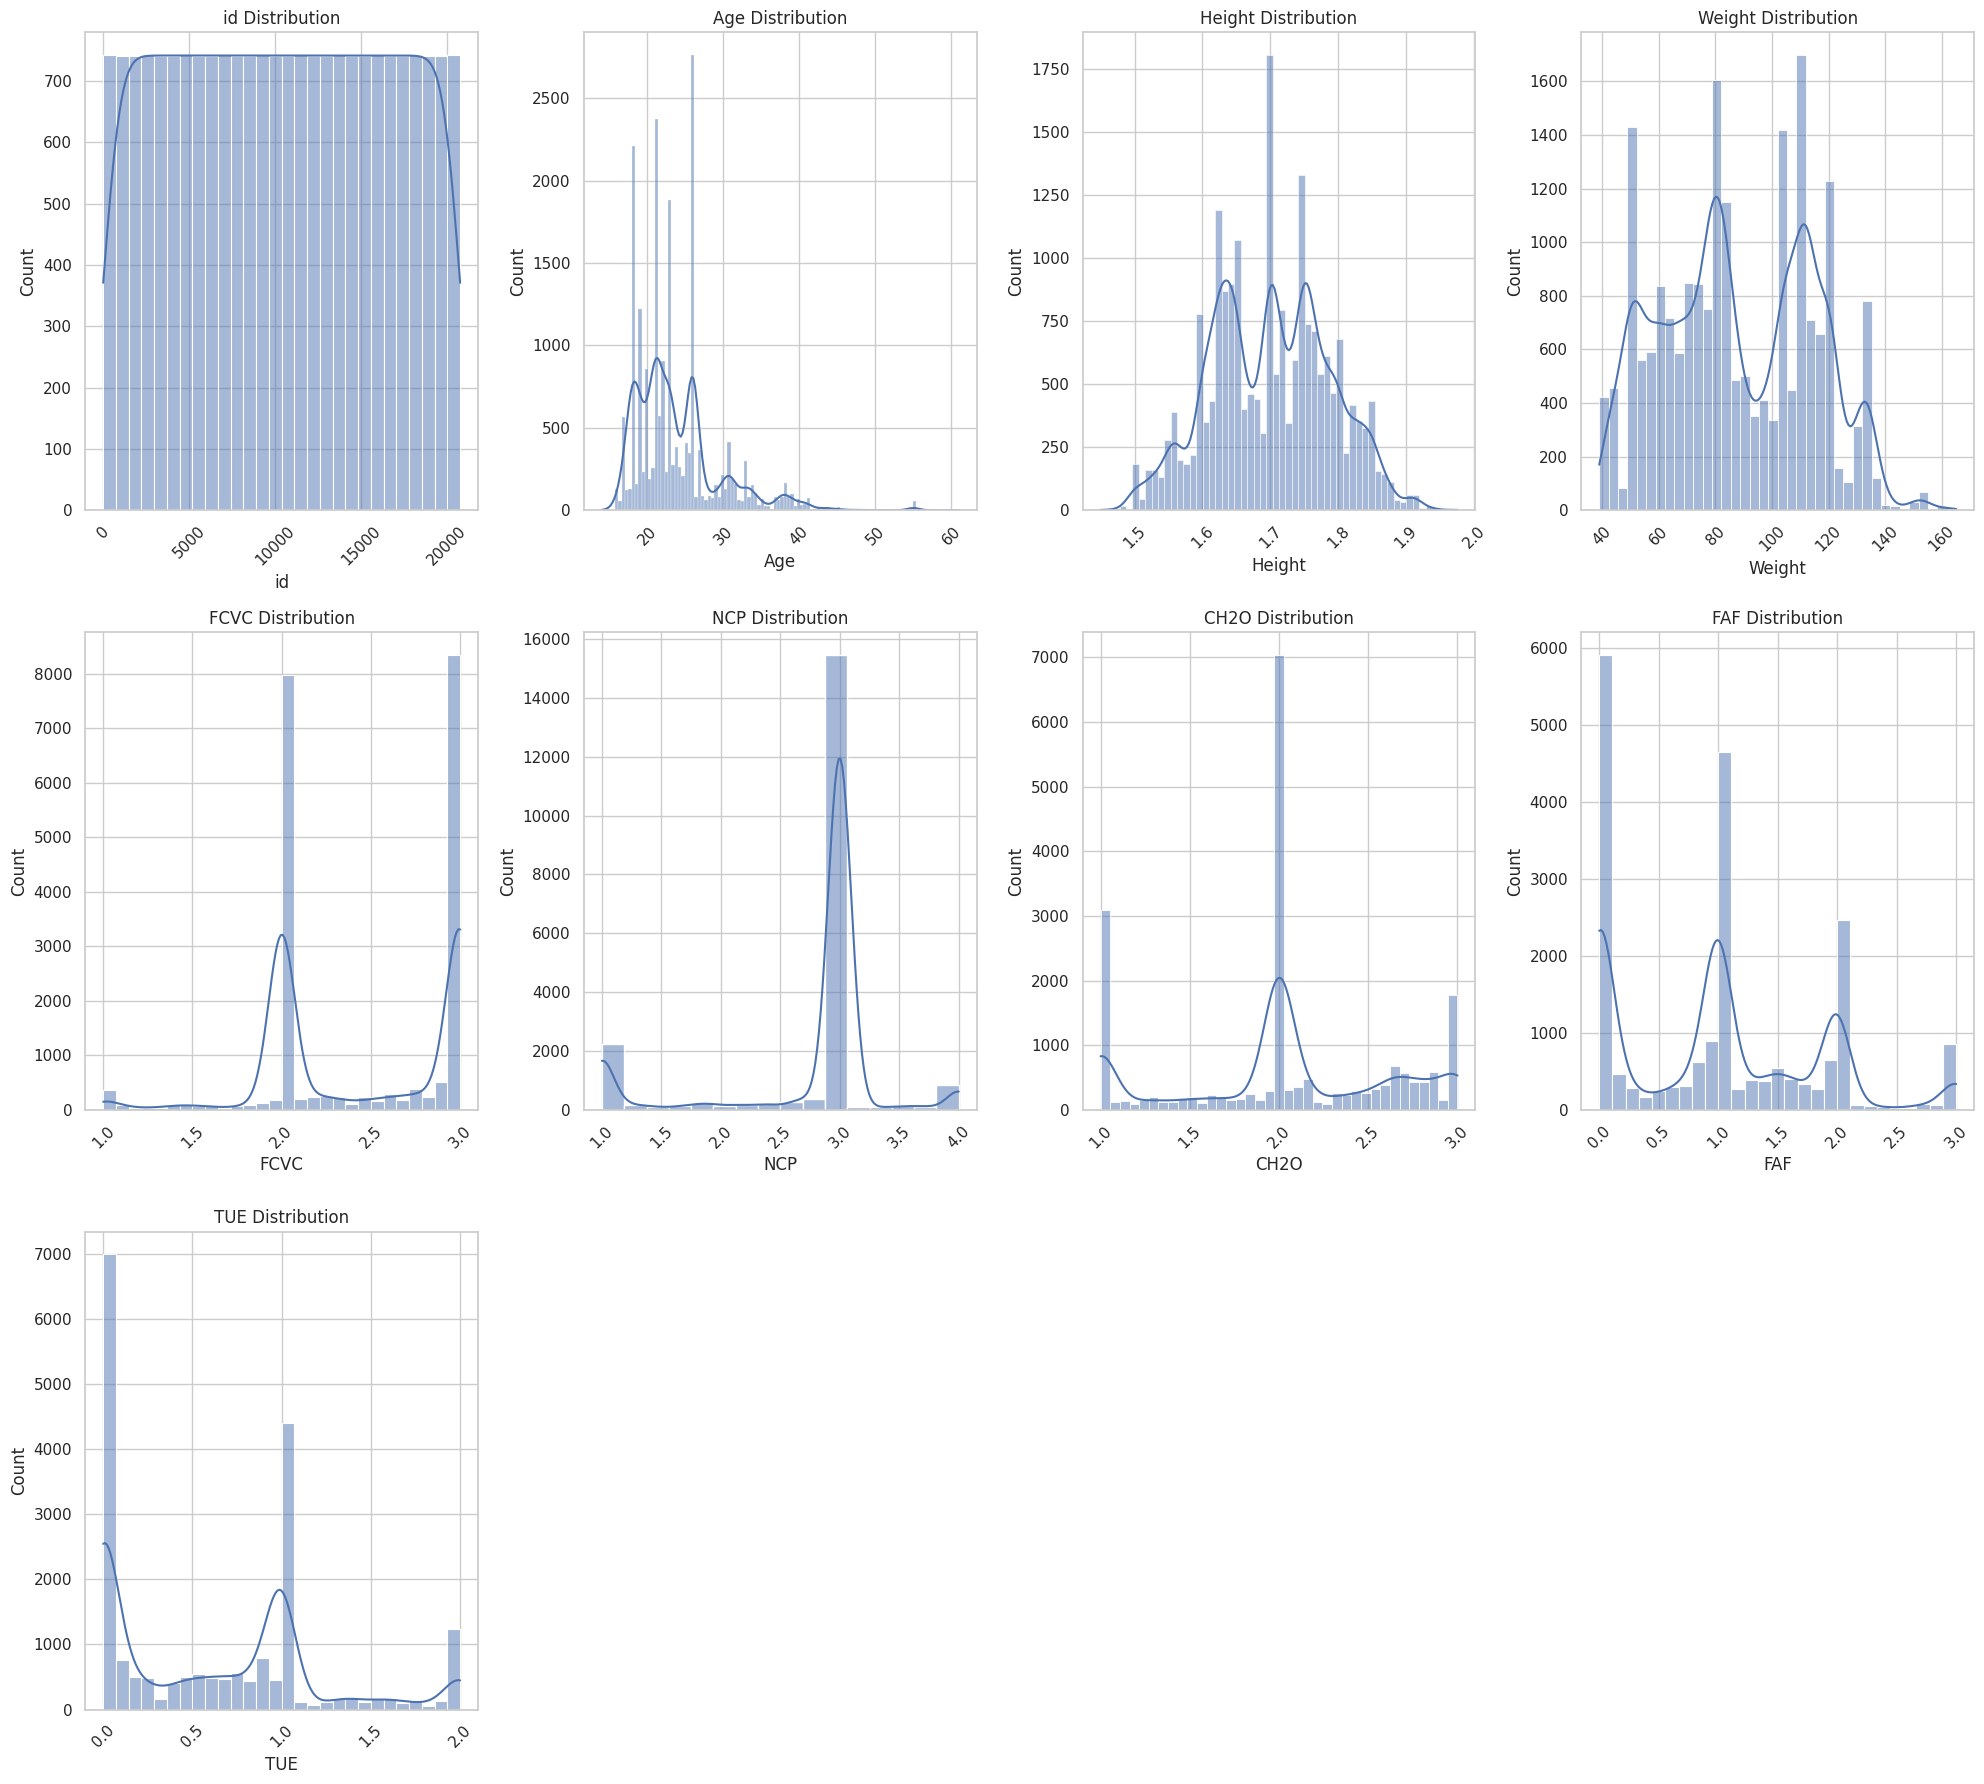

In [9]:
sns.set(style="whitegrid")
numerical_columns = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = train_df.select_dtypes(include=['object']).columns.tolist()
num_cols = len(numerical_columns)
num_rows = -(-num_cols // 4) 

plt.figure(figsize=(20, 6 * num_rows))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 4, i)
    sns.histplot(train_df[col], kde=True)
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Categorical Variable

We will visualize categorical variables! We will use to seaborn and matplotlib.pyplot library to visualize categorical variables. You can see the code in the below!

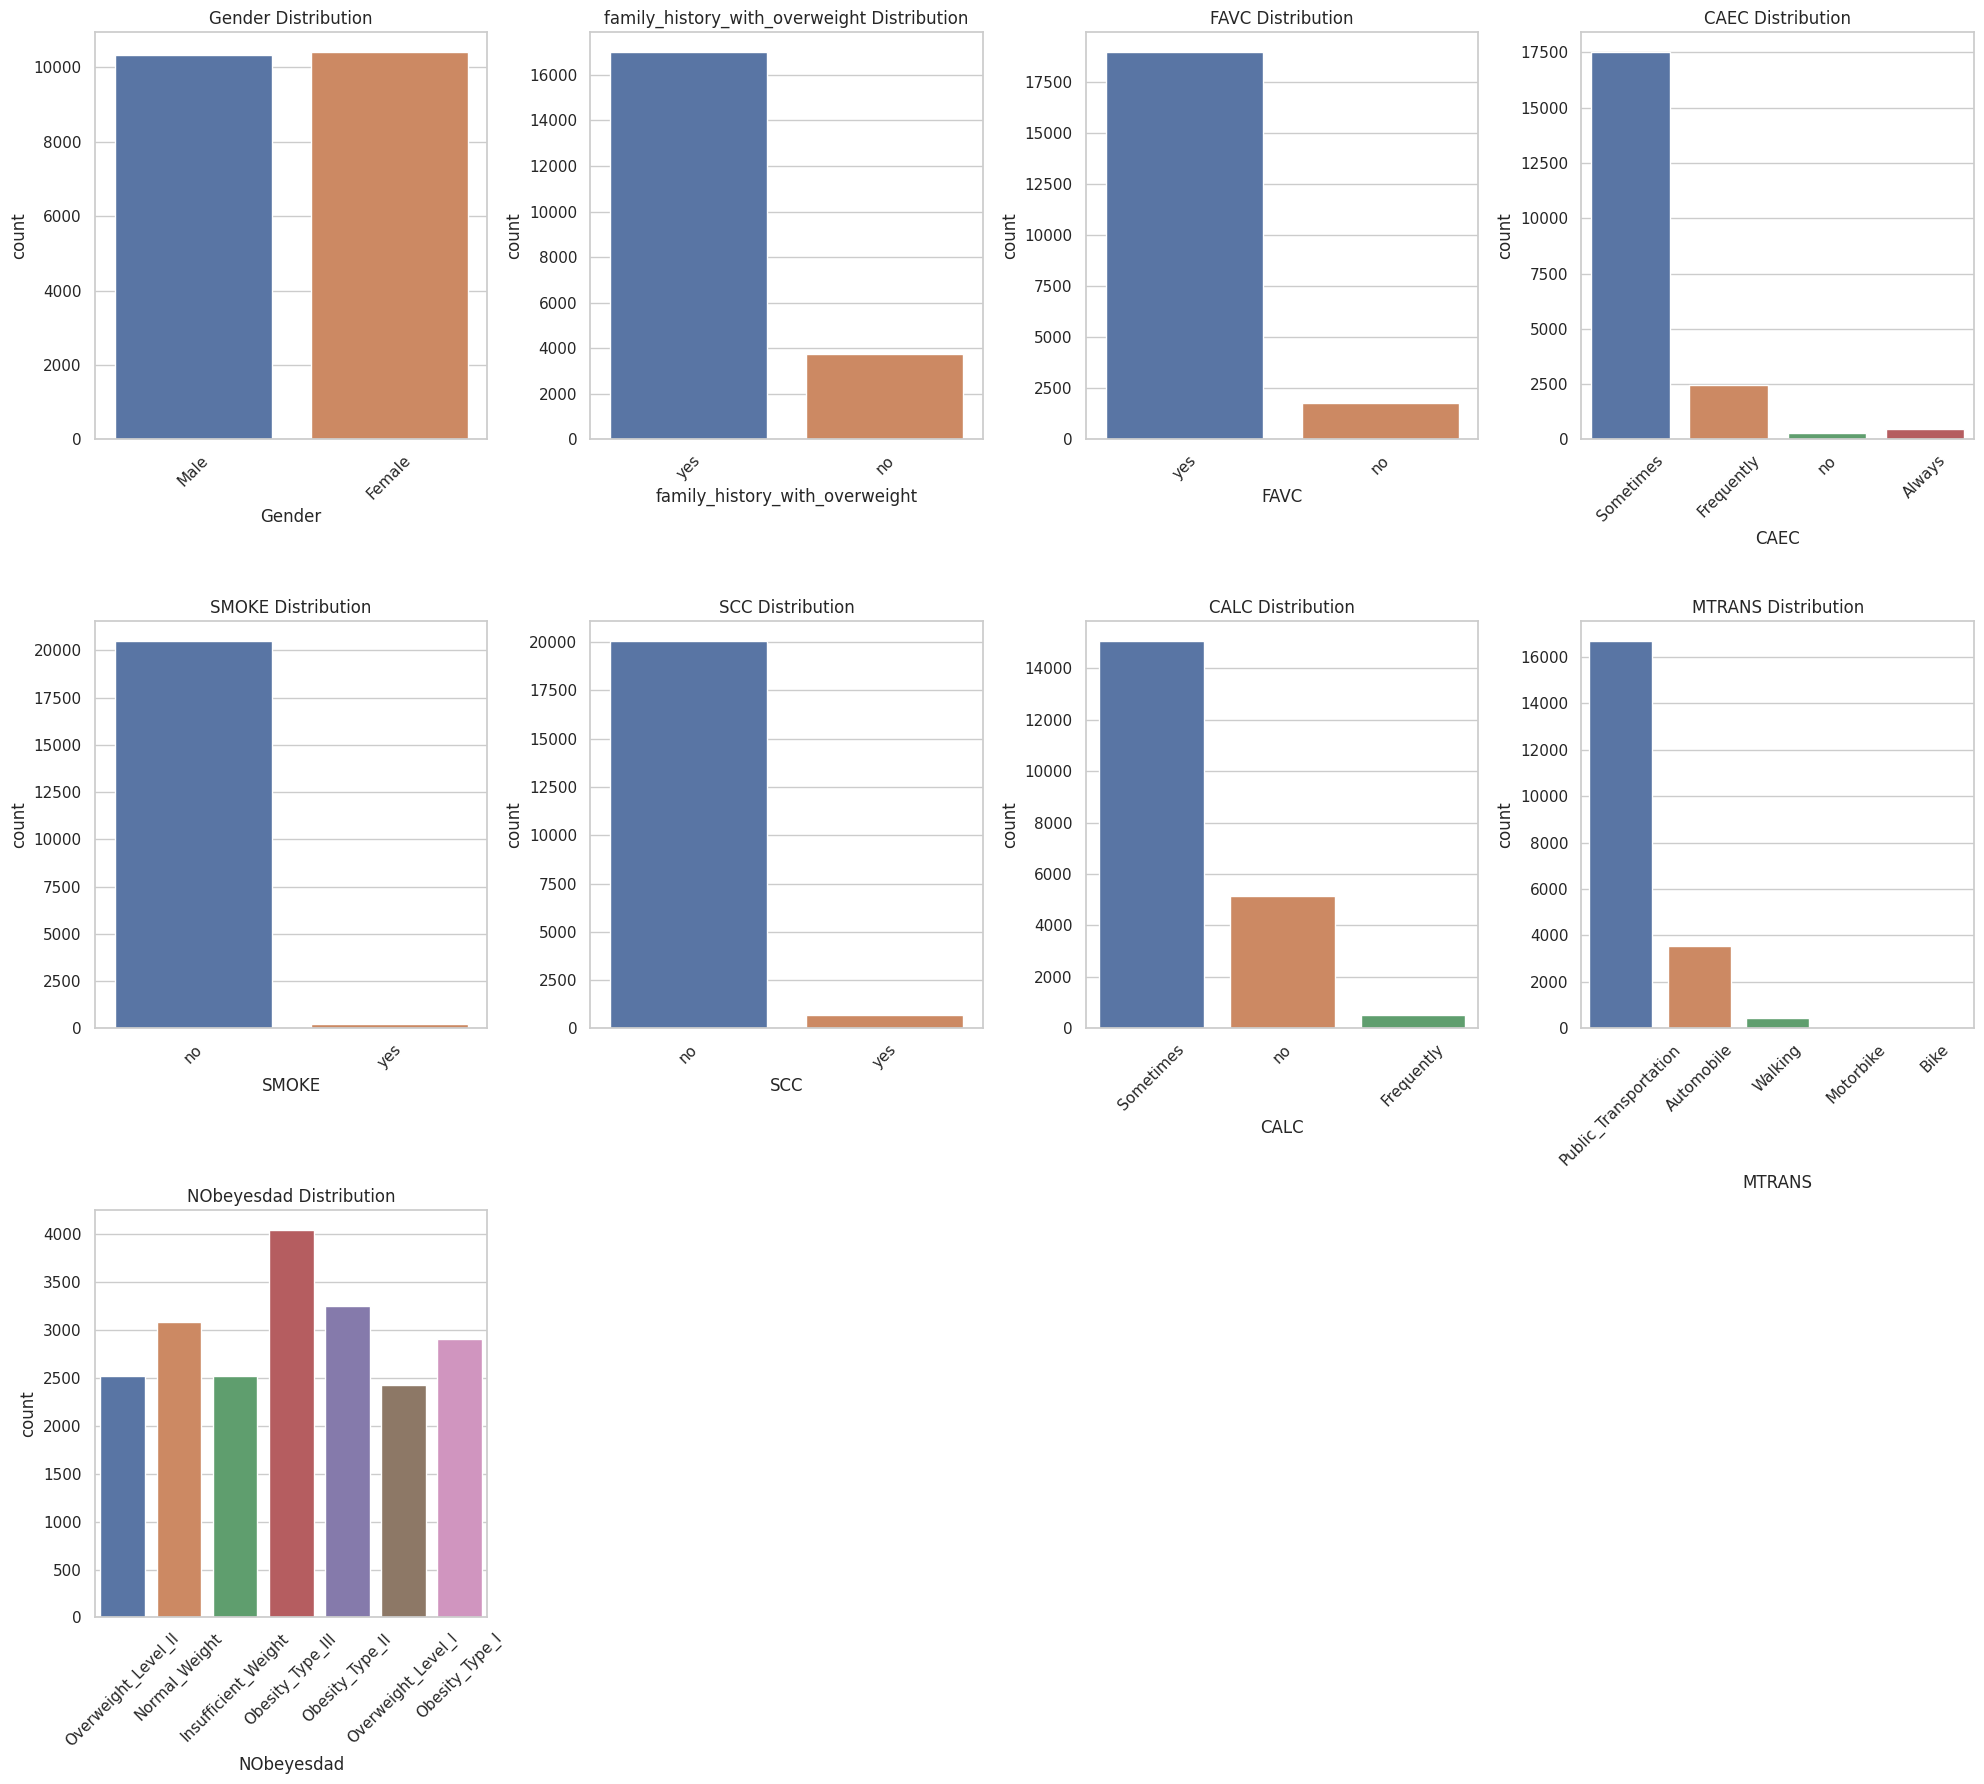

In [10]:
num_cols = len(categorical_columns)
num_rows = -(-num_cols // 4)

plt.figure(figsize=(20,6 *num_rows))
for i ,col in enumerate(categorical_columns,1):
    plt.subplot(num_rows, 4, i)
    sns.countplot(x= col, data=train_df)
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<a id = "8"></a><br>
# Basic Data Analysis

We will do basic data analysis. Basic data analysis serves as the foundation for understanding and extracting valuable insights from raw data. 


In [11]:
train_df[["Gender","Age"]].groupby(["Gender"], as_index = False).mean().sort_values(by="Age",ascending = False)

,Gender,Age
1,Male,24.221793
0,Female,23.464952


In [12]:
train_df[["Gender","Height"]].groupby(["Gender"], as_index = False).mean().sort_values(by="Height",ascending = False)

,Gender,Height
1,Male,1.754909
0,Female,1.646032


In [13]:
train_df[["Gender","Weight"]].groupby(["Gender"], as_index = False).mean().sort_values(by="Weight",ascending = False)

,Gender,Weight
1,Male,91.029625
0,Female,84.771838


In [14]:
train_df[["SMOKE","Age"]].groupby(["SMOKE"], as_index = False).mean().sort_values(by="Age",ascending = False)

,SMOKE,Age
1,yes,26.756709
0,no,23.806990


In [15]:
train_df[["family_history_with_overweight","Weight"]].groupby(["family_history_with_overweight"], as_index = False).mean().sort_values(by="Weight",ascending = False)

,family_history_with_overweight,Weight
1,yes,94.249966
0,no,58.975793


In [16]:
train_df[["family_history_with_overweight","FCVC"]].groupby(["family_history_with_overweight"], as_index = False).mean().sort_values(by="FCVC",ascending = False)

,family_history_with_overweight,FCVC
1,yes,2.457854
0,no,2.391626


In [17]:
train_df[["family_history_with_overweight","NCP"]].groupby(["family_history_with_overweight"], as_index = False).mean().sort_values(by="NCP",ascending = False)

,family_history_with_overweight,NCP
1,yes,2.776148
0,no,2.694003


<a id = "9"></a><br>
# Data Cleaning

In the data cleaning, we have the most important step for data science lifecycle. In a lot of project, this step is %80 of the work. We will give importance because of that data cleaning step. We will apply that steps: 

* **Outlier Detection**

    We will focus IQR test for outlier detection.
    
* **Missing Values**

    We will find and fill missing values.
    
In the end of this part we will visualize some values. We will see correlation matrix.

<a id = "10"></a><br>
## Outlier Detection

We will do outlier detection. We have some outlier values in the dataset. If you pass this step, you can't have good score in your model. You shouldn't pass! 

You can find a lot of method for outlier detection like IQR, z-score etc. . We will use IQR test in this dataset.

In [18]:
def detect_outliers(train_df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(train_df[c],25)
        # 3rd quartile
        Q3 = np.percentile(train_df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = train_df[(train_df[c] < Q1 - outlier_step) | (train_df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [19]:
train_df.loc[detect_outliers(train_df,numerical_columns)]

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad


We couldn't see any outlier values in dataframe in the above! If the dataframe has outlier values, we will show in the boxplot!

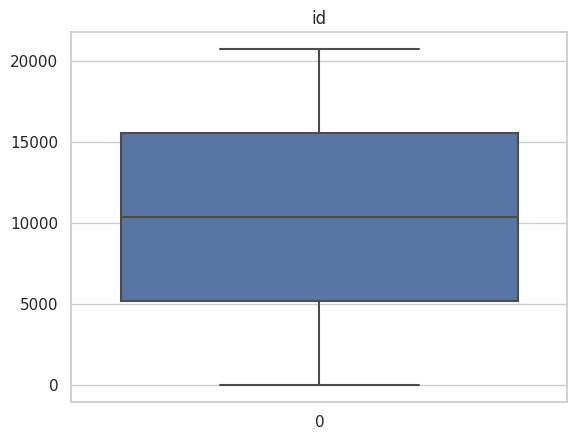

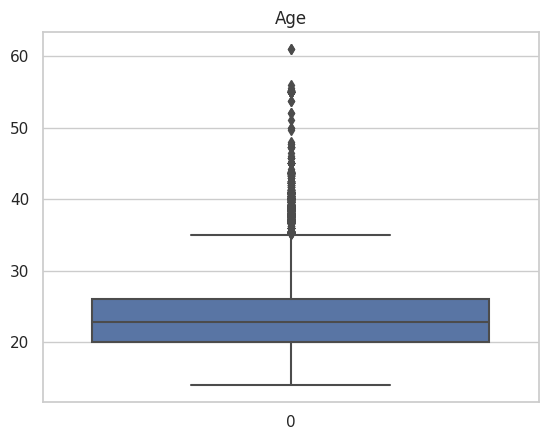

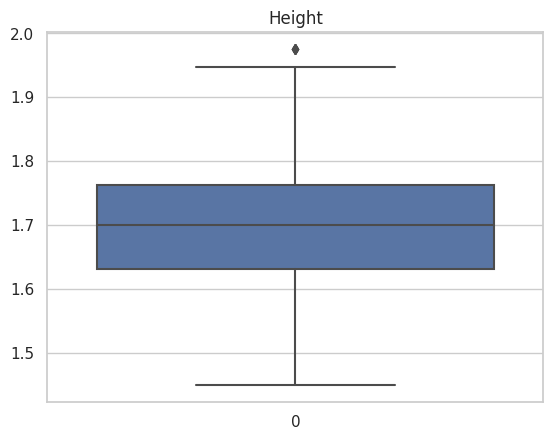

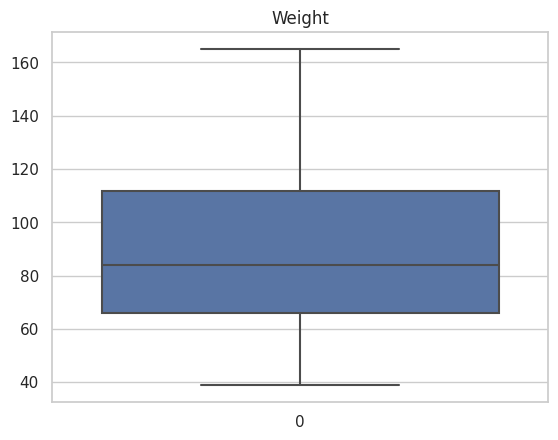

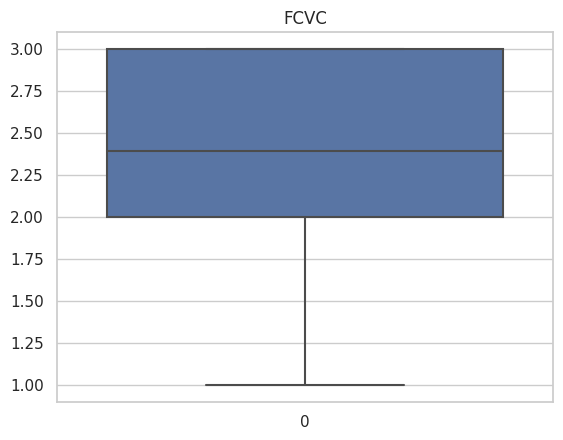

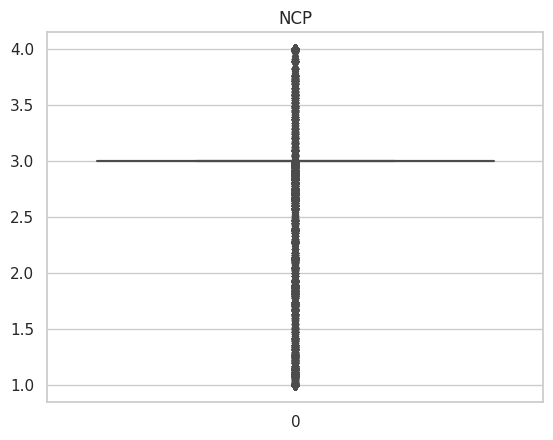

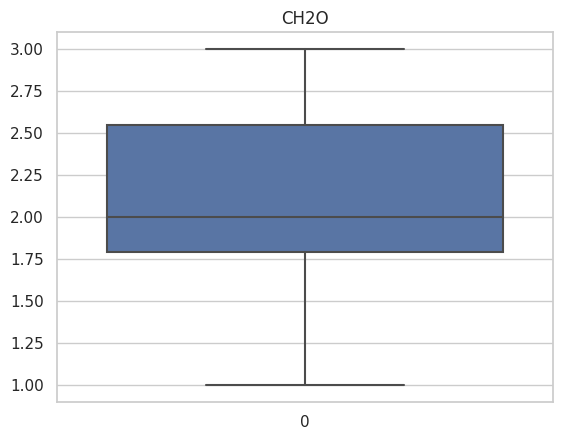

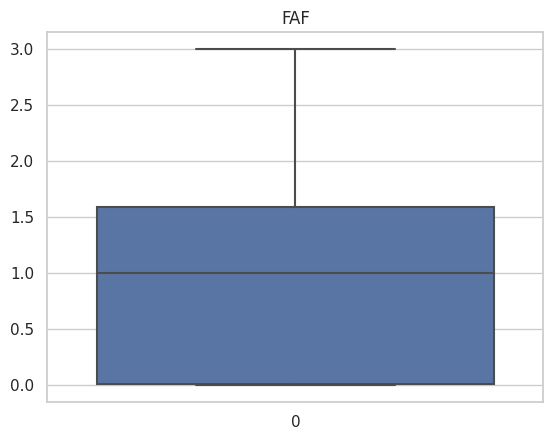

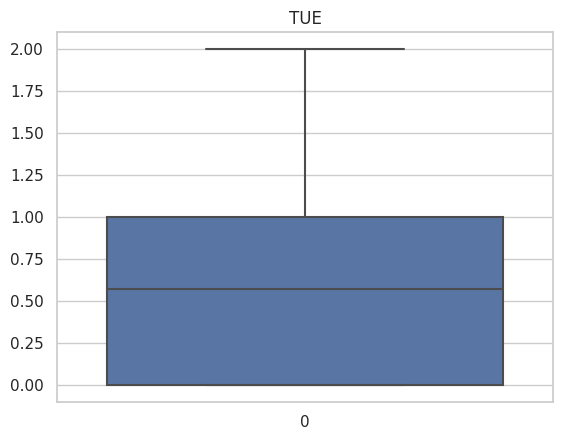

In [20]:
for i in numerical_columns:
    sns.boxplot(train_df[i])
    plt.title(i)
    plt.show()

If the dataframe has outlier values, we will remove in the below code!

In [21]:
def remove_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
    return data

train_scaled = remove_outliers(train_df[numerical_columns])

We can pass another step.

<a id = "11"></a><br>
## Missing Values

We need to check dataset that we have missing values or not! We will check. If we have, we will find them. After that we will find missing values. Some machine learning models can't fit your dataset so you need to handle with missing values! Let's find and fill them!

### Find Missing Values

In [22]:
train_df_len = len(train_df)
train_df = pd.concat([train_df,test_df],axis = 0).reset_index(drop = True)

We can see some missing value columns.

In [23]:
train_df.columns[train_df.isnull().any()]

Index(['NObeyesdad'], dtype='object')

We can see the sum of missing values by column.

In [24]:
train_df.isnull().sum()

id                                    0
Gender                                0
Age                                   0
Height                                0
Weight                                0
family_history_with_overweight        0
FAVC                                  0
FCVC                                  0
NCP                                   0
CAEC                                  0
SMOKE                                 0
CH2O                                  0
SCC                                   0
FAF                                   0
TUE                                   0
CALC                                  0
MTRANS                                0
NObeyesdad                        13840
dtype: int64

We will not fill NObeyesdad column because NObeyesdad is our target column. We can pass Feature Engineering step!

<a id = "12"></a><br>
# Feature Engineering

We will focus feature engineering for the best solution in the feature engineering. You can show your creative side in Feature Engineering. Let's show creative side in here!

## Body Mass Index (BMI)

A **Body Mass Index (BMI)** column can be created from Height and Weight. BMI is a common feature used to assess obesity.

The BMI calculation formula is:

Where:
- **BMI**: Body Mass Index
- **Weight**: Weight of the individual in kilograms (kg)
- **Height**: Height of the individual in meters (m)

BMI provides a simple numeric measure of a person's thickness or thinness, allowing health professionals to quickly assess a person's overall health status in terms of weight.

In [25]:
train_df['BMI'] = train_df['Weight'] / (train_df['Height'] ** 2)
test_df['BMI'] = test_df['Weight'] / (test_df['Height'] ** 2)

train_df

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II,28.259565
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight,23.422091
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight,17.126706
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III,44.855798
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II,25.599151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34593,34593,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.000000,Sometimes,no,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation,NaN,26.333478
34594,34594,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,NaN,24.524346
34595,34595,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.273740,Frequently,no,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation,NaN,17.652091
34596,34596,Male,21.000000,1.620000,53.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,3.000000,2.000000,no,Public_Transportation,NaN,20.195092


## Age Binning 

**Age Group** refers to the categorization of ages into groups or bins to capture potential age-related patterns.


In [26]:
from sklearn.base import BaseEstimator, TransformerMixin

In [27]:
class AgeBinning(BaseEstimator, TransformerMixin):
    def __init__(self, n_bins):
        self.n_bins = n_bins
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        transformed = pd.qcut(X['Age'], self.n_bins, labels=False)
        transformed[transformed.isna()] = 0
        transformed_series = pd.Series(transformed, 
                                       name=f'QCut{self.n_bins}_Age',
                                       index=X.index)
        X_copy = X.copy()
        return pd.concat([X_copy, transformed_series], axis=1)
        
AgeBinning(5).fit_transform(train_df)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI,QCut5_Age
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II,28.259565,3
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight,23.422091,0
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight,17.126706,0
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III,44.855798,1
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II,25.599151,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34593,34593,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.000000,Sometimes,no,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation,NaN,26.333478,2
34594,34594,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,NaN,24.524346,4
34595,34595,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.273740,Frequently,no,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation,NaN,17.652091,2
34596,34596,Male,21.000000,1.620000,53.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,3.000000,2.000000,no,Public_Transportation,NaN,20.195092,1


## Eating Habits: FAVC, FCVC, CH2O Interactions

**Eating Habits** can be represented by combining features such as 'FAVC' (frequent consumption of high-calorie food), 'FCVC' (frequency of vegetables consumption), and 'CH2O' (water consumption) into a single feature using Kmeans clustering.

In [28]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder, StandardScaler,RobustScaler
from sklearn.decomposition import PCA

In [29]:
class KMeansClusterer(BaseEstimator, TransformerMixin):
    def __init__(self, features, n_clusters=20, random_state=0, n_components=None):
        self.features = features
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.n_components = n_components
        self.kmeans = KMeans(n_clusters=n_clusters, n_init=50, random_state=random_state)
        self.scaler = StandardScaler()
        self.pca = PCA(n_components=n_components)
    
    def fit(self, X, y=None):
        X_scaled = self.scaler.fit_transform(X.loc[:, self.features])
        if self.n_components is not None:
            X_scaled = self.pca.fit_transform(X_scaled)
        self.kmeans.fit(X_scaled)
        return self
    
    def transform(self, X):
        X_scaled = self.scaler.transform(X.loc[:, self.features])
        
        # Check for NaN values and replace them with zeros or appropriate values
        if np.isnan(X_scaled).any():
            X_scaled = np.nan_to_num(X_scaled)
        
        if self.n_components is not None:
            X_scaled = self.pca.transform(X_scaled)
        
        X_new = pd.DataFrame()
        X_new["Cluster"] = self.kmeans.predict(X_scaled)
        
        X_copy = X.copy()
        # Convert the "Cluster" column to dense format
        X_new["Cluster"] = X_new["Cluster"].values
        return pd.concat([X_copy.reset_index(drop=True), X_new.reset_index(drop=True)], axis=1)

In [30]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit and transform 'FAVC' column
train_df['FAVC_encoded'] = label_encoder.fit_transform(train_df['FAVC'])
test_df['FAVC_encoded'] = label_encoder.fit_transform(test_df['FAVC'])

We choose to use 12 clusters, which is twice the number of target classes, as an experimental approach to determine if K-means clustering can generate valuable features. This approach aims to explore the potential of clustering to uncover nuanced patterns in eating habits.

In [31]:
#With PCA (specify the number of components, e.g., 3)
clusterer_with_pca = KMeansClusterer(features=['FAVC_encoded',"FCVC","CH2O"], n_clusters=12, random_state=123, n_components=3)

# Fit and transform your data
clusterer_with_pca.fit_transform(train_df)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,...,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI,FAVC_encoded,Cluster
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,...,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II,28.259565,1,7
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,...,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight,23.422091,1,0
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,...,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight,17.126706,1,0
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,...,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III,44.855798,1,6
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,...,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II,25.599151,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34593,34593,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.000000,Sometimes,...,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation,NaN,26.333478,0,2
34594,34594,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.000000,Sometimes,...,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,NaN,24.524346,1,6
34595,34595,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.273740,Frequently,...,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation,NaN,17.652091,1,6
34596,34596,Male,21.000000,1.620000,53.000000,yes,yes,2.000000,3.000000,Sometimes,...,2.000000,no,3.000000,2.000000,no,Public_Transportation,NaN,20.195092,1,0


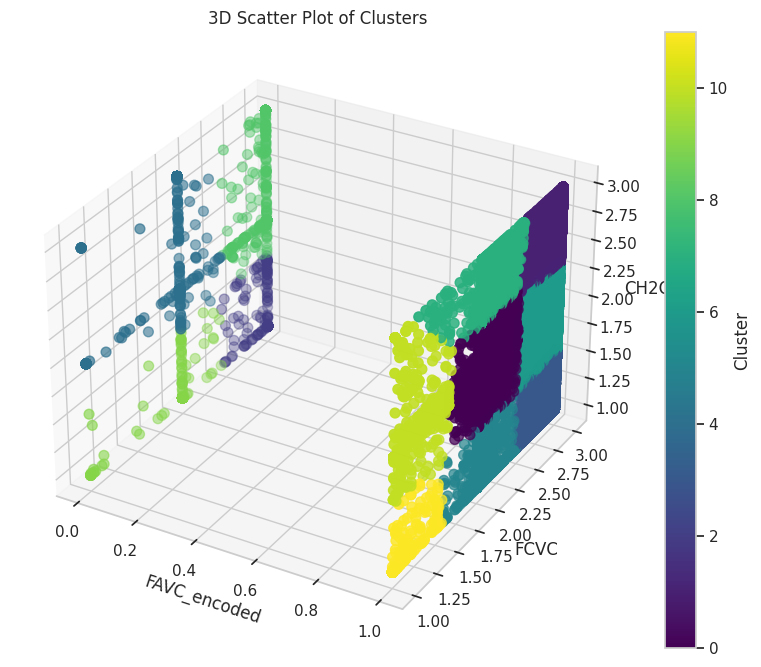

In [32]:
#Visualising the clusters
from mpl_toolkits.mplot3d import Axes3D

# Assuming X_train is your training data
X_train_selected = train_df[['FAVC_encoded',"FCVC","CH2O"]]

# Fit and transform with PCA and KMeansClusterer
clusterer_with_pca.fit(X_train_selected)
X_transformed = clusterer_with_pca.transform(X_train_selected)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of data points colored by cluster
scatter = ax.scatter(X_transformed["FAVC_encoded"], X_transformed["FCVC"], X_transformed["CH2O"], c=X_transformed["Cluster"], cmap='viridis', s=50)

# Add labels and title
ax.set_xlabel("FAVC_encoded")
ax.set_ylabel("FCVC")
ax.set_zlabel("CH2O")
ax.set_title('3D Scatter Plot of Clusters')

# Add a colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster')

plt.show()

## Physical Activity Levels: FAF & TUE Interactions

**Physical Activity Levels** can be represented by creating a feature based on the interactions between 'FAF' (Physical activity frequency) and 'TUE' (Time using technology devices).

In [33]:
class PhysicalActivityTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        X_copy['PhysicalActivity'] = X_copy['FAF'] - X_copy['TUE']
        return X_copy

PhysicalActivityTransformer().fit_transform(train_df)   

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,...,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI,FAVC_encoded,PhysicalActivity
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,...,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II,28.259565,1,-0.976473
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,...,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight,23.422091,1,0.000000
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,...,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight,17.126706,1,-0.807539
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,...,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III,44.855798,1,0.687664
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,...,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II,25.599151,1,1.036252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34593,34593,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.000000,Sometimes,...,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation,NaN,26.333478,0,0.028444
34594,34594,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.000000,Sometimes,...,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,NaN,24.524346,1,0.000000
34595,34595,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.273740,Frequently,...,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation,NaN,17.652091,1,0.949840
34596,34596,Male,21.000000,1.620000,53.000000,yes,yes,2.000000,3.000000,Sometimes,...,2.000000,no,3.000000,2.000000,no,Public_Transportation,NaN,20.195092,1,1.000000


## H2O Binning: Hydration Level

**Hydration Level** can be categorized based on 'CH2O' (Water consumption) into 'Low,' 'Moderate,' or 'High' hydration categories, creating three bins.


In [34]:
class H2OBinning(BaseEstimator, TransformerMixin):
    def __init__(self, n_bins):
        self.n_bins = n_bins
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        transformed = pd.qcut(X['CH2O'], self.n_bins, labels=False)
        transformed[transformed.isna()] = 0
        transformed_series = pd.Series(transformed, 
                                       name=f'QCut{self.n_bins}_CH2O',
                                       index=X.index)
        X_copy = X.copy()
        return pd.concat([X_copy, transformed_series], axis=1)
        
H2OBinning(3).fit_transform(train_df)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,...,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI,FAVC_encoded,QCut3_CH2O
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,...,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II,28.259565,1,2
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,...,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight,23.422091,1,0
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,...,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight,17.126706,1,0
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,...,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III,44.855798,1,0
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,...,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II,25.599151,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34593,34593,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.000000,Sometimes,...,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation,NaN,26.333478,0,0
34594,34594,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.000000,Sometimes,...,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,NaN,24.524346,1,0
34595,34595,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.273740,Frequently,...,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation,NaN,17.652091,1,0
34596,34596,Male,21.000000,1.620000,53.000000,yes,yes,2.000000,3.000000,Sometimes,...,2.000000,no,3.000000,2.000000,no,Public_Transportation,NaN,20.195092,1,0


## Nutrition Habits: CAEC & CALC Interactions

**Nutrition Habits** can be represented by combining features such as 'CAEC' (Consumption of food between meals) and 'CALC' (Consumption of alcohol) into a single feature to capture overall nutrition habits.

In [35]:
class NutritionHabitsTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        X_copy['NutritionHabits'] = X_copy['CAEC'] + '_' + X_copy['CALC']
        return X_copy
    
NutritionHabitsTransformer().fit_transform(train_df)   

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,...,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI,FAVC_encoded,NutritionHabits
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,...,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II,28.259565,1,Sometimes_Sometimes
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,...,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight,23.422091,1,Frequently_no
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,...,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight,17.126706,1,Sometimes_no
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,...,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III,44.855798,1,Sometimes_Sometimes
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,...,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II,25.599151,1,Sometimes_Sometimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34593,34593,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.000000,Sometimes,...,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation,NaN,26.333478,0,Sometimes_Sometimes
34594,34594,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.000000,Sometimes,...,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,NaN,24.524346,1,Sometimes_Sometimes
34595,34595,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.273740,Frequently,...,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation,NaN,17.652091,1,Frequently_Sometimes
34596,34596,Male,21.000000,1.620000,53.000000,yes,yes,2.000000,3.000000,Sometimes,...,2.000000,no,3.000000,2.000000,no,Public_Transportation,NaN,20.195092,1,Sometimes_no


## Age_Gender Interaction Features

**Interaction Features** can be created between variables that are likely to have a combined effect on obesity, such as 'Age' and 'Gender'.

In [36]:
class AgeGenderTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, age_field='Age', gender_field='Gender'):
        self.age_field = age_field
        self.gender_field = gender_field
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        X_copy['Age_Gender'] = X_copy[self.age_field].round().astype('int').astype('str') + X_copy[self.gender_field]
        return X_copy

train_ag = AgeGenderTransformer().fit_transform(train_df)   
AgeGenderTransformer().fit_transform(train_ag)    

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,...,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI,FAVC_encoded,Age_Gender
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,...,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II,28.259565,1,24Male
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,...,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight,23.422091,1,18Female
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,...,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight,17.126706,1,18Female
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,...,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III,44.855798,1,21Female
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,...,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II,25.599151,1,32Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34593,34593,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.000000,Sometimes,...,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation,NaN,26.333478,0,23Male
34594,34594,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.000000,Sometimes,...,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,NaN,24.524346,1,29Female
34595,34595,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.273740,Frequently,...,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation,NaN,17.652091,1,23Female
34596,34596,Male,21.000000,1.620000,53.000000,yes,yes,2.000000,3.000000,Sometimes,...,2.000000,no,3.000000,2.000000,no,Public_Transportation,NaN,20.195092,1,21Male


## Feature Transformation
We will do feature transformation for these features. Some models don't fit for categorical values. This is the best thing we can do! Let's do!

In [37]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler

In [38]:
cat_features = ['Gender', 'family_history_with_overweight', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

one_hot_encoder = OneHotEncoder()
encoded_features = one_hot_encoder.fit_transform(train_df[cat_features]).toarray()

column_names = []
for i, column in enumerate(cat_features):
    unique_labels = train_df[column].unique()
    
    names = [f"{column}_{label}" for label in unique_labels]
    column_names.extend(names)

one_hot_encoded_df = pd.DataFrame(encoded_features, columns=column_names)

train_df = pd.concat([train_df, one_hot_encoded_df], axis=1)

In [39]:
train_df

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,...,SCC_yes,CALC_Sometimes,CALC_no,CALC_Frequently,CALC_Always,MTRANS_Public_Transportation,MTRANS_Automobile,MTRANS_Walking,MTRANS_Motorbike,MTRANS_Bike
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34593,34593,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.000000,Sometimes,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
34594,34594,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.000000,Sometimes,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
34595,34595,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.273740,Frequently,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
34596,34596,Male,21.000000,1.620000,53.000000,yes,yes,2.000000,3.000000,Sometimes,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [40]:
categorical_columns = train_df.select_dtypes(include=['object']).columns.tolist()

train_df = train_df.drop(columns=[col for col in categorical_columns if col != 'NObeyesdad'])

In [41]:
train_df.columns

Index(['id', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'NObeyesdad', 'BMI', 'FAVC_encoded', 'Gender_Male', 'Gender_Female',
       'family_history_with_overweight_yes',
       'family_history_with_overweight_no', 'SMOKE_no', 'SMOKE_yes', 'SCC_no',
       'SCC_yes', 'CALC_Sometimes', 'CALC_no', 'CALC_Frequently',
       'CALC_Always', 'MTRANS_Public_Transportation', 'MTRANS_Automobile',
       'MTRANS_Walking', 'MTRANS_Motorbike', 'MTRANS_Bike'],
      dtype='object')

In [42]:
train_df

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,...,SCC_yes,CALC_Sometimes,CALC_no,CALC_Frequently,CALC_Always,MTRANS_Public_Transportation,MTRANS_Automobile,MTRANS_Walking,MTRANS_Motorbike,MTRANS_Bike
0,0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473,Overweight_Level_II,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000,Normal_Weight,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584,Insufficient_Weight,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199,Obesity_Type_III,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721,Overweight_Level_II,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34593,34593,23.327836,1.721384,78.030383,2.813234,3.000000,1.000000,0.807076,0.778632,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
34594,34594,29.000000,1.590000,62.000000,3.000000,3.000000,2.000000,0.000000,0.000000,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
34595,34595,22.935612,1.585547,44.376637,3.000000,2.273740,2.000000,1.949840,1.000000,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
34596,34596,21.000000,1.620000,53.000000,2.000000,3.000000,2.000000,3.000000,2.000000,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


<a id = "13"></a><br>
# Modeling
We will put model for our dataset. We completed all processes for our dataset! Firstly we will seperate train-test split.

We need to import some libraries for machine learning models!

In [43]:
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer


## Train - Test Split

In [44]:
test = train_df[train_df_len:]
test.drop("NObeyesdad", axis=1, inplace=True)
test

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,BMI,...,SCC_yes,CALC_Sometimes,CALC_no,CALC_Frequently,CALC_Always,MTRANS_Public_Transportation,MTRANS_Automobile,MTRANS_Walking,MTRANS_Motorbike,MTRANS_Bike
20758,20758,26.899886,1.848294,120.644178,2.938616,3.000000,2.825629,0.855400,0.000000,35.315411,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
20759,20759,21.000000,1.600000,66.000000,2.000000,1.000000,3.000000,1.000000,0.000000,25.781250,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
20760,20760,26.000000,1.643355,111.600553,3.000000,3.000000,2.621877,0.000000,0.250502,41.324115,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
20761,20761,20.979254,1.553127,103.669116,2.000000,2.977909,2.786417,0.094851,0.000000,42.976937,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
20762,20762,26.000000,1.627396,104.835346,3.000000,3.000000,2.653531,0.000000,0.741069,39.584143,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34593,34593,23.327836,1.721384,78.030383,2.813234,3.000000,1.000000,0.807076,0.778632,26.333478,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
34594,34594,29.000000,1.590000,62.000000,3.000000,3.000000,2.000000,0.000000,0.000000,24.524346,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
34595,34595,22.935612,1.585547,44.376637,3.000000,2.273740,2.000000,1.949840,1.000000,17.652091,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
34596,34596,21.000000,1.620000,53.000000,2.000000,3.000000,2.000000,3.000000,2.000000,20.195092,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [45]:
train_df.columns

Index(['id', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'NObeyesdad', 'BMI', 'FAVC_encoded', 'Gender_Male', 'Gender_Female',
       'family_history_with_overweight_yes',
       'family_history_with_overweight_no', 'SMOKE_no', 'SMOKE_yes', 'SCC_no',
       'SCC_yes', 'CALC_Sometimes', 'CALC_no', 'CALC_Frequently',
       'CALC_Always', 'MTRANS_Public_Transportation', 'MTRANS_Automobile',
       'MTRANS_Walking', 'MTRANS_Motorbike', 'MTRANS_Bike'],
      dtype='object')

In [46]:
train = train_df[:train_df_len]
X = train.drop("NObeyesdad", axis=1)  # Bağımsız değişkenler
y = train["NObeyesdad"]  # Bağımlı değişken
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.33, random_state = 42)
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))
print("test",len(test_df))

X_train 9317
X_test 4590
y_train 9317
y_test 4590
test 13840


In [47]:
models = {
    'CatBoost': CatBoostClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'LGBM': LGBMClassifier()
}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f'{model_name}: Accuracy = {accuracy:.4f}')

Learning rate set to 0.088666
0:	learn: 1.6269200	total: 88.3ms	remaining: 1m 28s
1:	learn: 1.4291538	total: 107ms	remaining: 53.3s
2:	learn: 1.2813270	total: 125ms	remaining: 41.7s
3:	learn: 1.1641417	total: 143ms	remaining: 35.7s
4:	learn: 1.0664587	total: 161ms	remaining: 32.1s
5:	learn: 0.9923614	total: 178ms	remaining: 29.6s
6:	learn: 0.9258879	total: 200ms	remaining: 28.3s
7:	learn: 0.8702911	total: 218ms	remaining: 27.1s
8:	learn: 0.8193393	total: 237ms	remaining: 26.1s
9:	learn: 0.7756941	total: 254ms	remaining: 25.2s
10:	learn: 0.7373762	total: 272ms	remaining: 24.5s
11:	learn: 0.7044252	total: 291ms	remaining: 24s
12:	learn: 0.6751579	total: 309ms	remaining: 23.4s
13:	learn: 0.6455519	total: 326ms	remaining: 22.9s
14:	learn: 0.6207838	total: 344ms	remaining: 22.6s
15:	learn: 0.5974217	total: 362ms	remaining: 22.2s
16:	learn: 0.5766871	total: 381ms	remaining: 22s
17:	learn: 0.5581973	total: 399ms	remaining: 21.8s
18:	learn: 0.5418251	total: 420ms	remaining: 21.7s
19:	learn: 0.

We can choose LGBM. LGBM gives the best accuracy_score in Multi-Class Prediction of Obesity Risk the  dataset!

In [48]:
lgbm = LGBMClassifier()
lgbm = lgbm.fit(X_train, y_train)
print(accuracy_score(lgbm.predict(X_test),y_test))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002605 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2556
[LightGBM] [Info] Number of data points in the train set: 9317, number of used features: 25
[LightGBM] [Info] Start training from score -2.089473
[LightGBM] [Info] Start training from score -1.903977
[LightGBM] [Info] Start training from score -1.961814
[LightGBM] [Info] Start training from score -1.860967
[LightGBM] [Info] Start training from score -1.620446
[LightGBM] [Info] Start training from score -2.147500
[LightGBM] [Info] Start training from score -2.149339
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
0.901525054466231


<a id = "14"></a><br>
# Prediction and Submit
We will predict and submit our .csv file. We can finish this notebook in here!

In [49]:
test_obeyes = pd.Series(lgbm.predict(test), name = "NObeyesdad")
results = pd.concat([test_id, test_obeyes],axis = 1)
results.to_csv("submission.csv",header=True, index = False)

In [50]:
submission_df = pd.read_csv("submission.csv")
submission_df

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
...,...,...
13835,34593,Overweight_Level_II
13836,34594,Normal_Weight
13837,34595,Insufficient_Weight
13838,34596,Normal_Weight


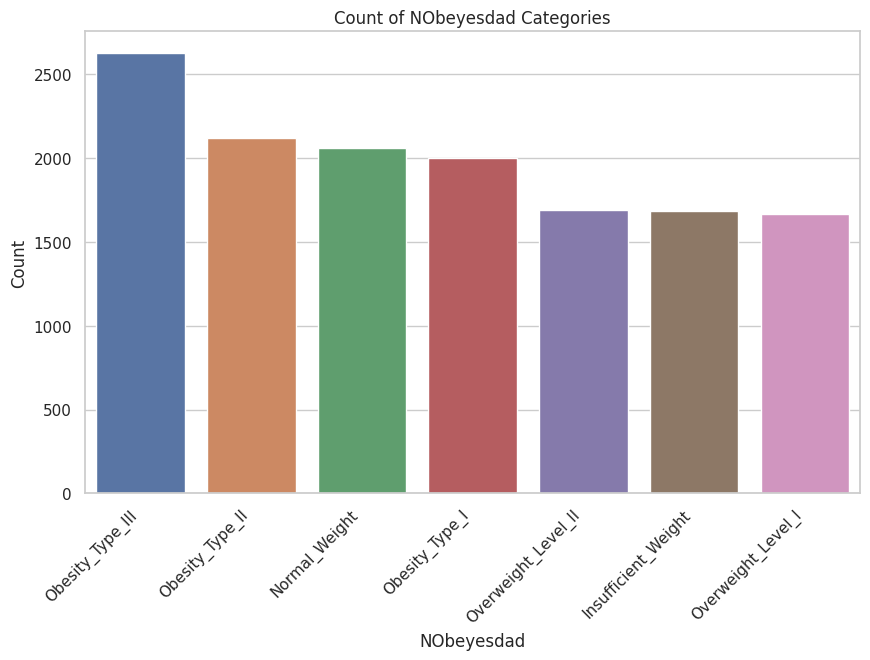

In [51]:
plt.figure(figsize=(10, 6))
sns.countplot(data=submission_df, x='NObeyesdad', order=submission_df['NObeyesdad'].value_counts().index)
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.xlabel('NObeyesdad')
plt.ylabel('Count')
plt.title('Count of NObeyesdad Categories')
plt.show()